<a href="https://colab.research.google.com/github/MoisesGuerreroUdeA/Seminario-Analitica-CDatos/blob/main/jupyter/ME03/ME03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de inteligencia artificial para mejorar el desempeño de un proyecto de generación fotovoltaica

## Seminario de Analítica y Ciencia de Datos

Moisés Alfonso Guerrero Jiménez, Andrés Castaño Licona

### 1. Repositorio

Para las actividades relacionadas con la entrega del `ME03` y el análisis de datos, se hará uso de un repositorio en *Github* donde se tendrá el material usado incluyendo funciones, documentación relacionada y así como el presente archivo a manera de cuaderno de Jupyter.

### 2. Datos

Para el desarrollo de la presente actividad se hará uso de datos disponibles en Kaggle en la url https://www.kaggle.com/datasets/dronio/SolarEnergy

In [1]:
import json

# Como prerrequisito es necesario tener un archivo de credenciales kaggle.json en el directorio del notebook
file = open('kaggle.json',"r")
api_token = json.load(file)

# Creamos el directorio de .kaggle dentro del entorno de Colab
! mkdir /home/jovyan/.kaggle
# Agregamos el archivo kaggle.json vacío
! touch /home/jovyan/.kaggle/kaggle.json

# Abrimos el archivo y escribimos el token
with open('/home/jovyan/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Asignamos permisos para acceder al archivo de credenciales
! chmod 600 /home/jovyan/.kaggle/kaggle.json

# Instalamos kaggle CLI
! pip install kaggle

# Descargamos el Dataset con la API de kaggle
! kaggle datasets download -d dronio/SolarEnergy

# Descomprimimos el archivo .zip descargado
! unzip -q SolarEnergy.zip

mkdir: cannot create directory ‘/home/jovyan/.kaggle’: No such file or directory
touch: cannot touch '/home/jovyan/.kaggle/kaggle.json': No such file or directory


FileNotFoundError: ignored

In [2]:
import json

# Como prerrequisito es necesario tener un archivo de credenciales kaggle.json en el directorio del notebook
file = open('kaggle.json',"r")
api_token = json.load(file)

# Creamos el directorio de .kaggle dentro del entorno de Colab
! mkdir /root/.kaggle
# Agregamos el archivo kaggle.json vacío
! touch /root/.kaggle/kaggle.json

# Abrimos el archivo y escribimos el token
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Asignamos permisos para acceder al archivo de credenciales
! chmod 600 /root/.kaggle/kaggle.json

# Instalamos kaggle CLI
! pip install kaggle

# Descargamos el Dataset con la API de kaggle
! kaggle datasets download -d dronio/SolarEnergy

# Descomprimimos el archivo .zip descargado
! unzip -q SolarEnergy.zip

  0% 0.00/511k [00:00<?, ?B/s]
100% 511k/511k [00:00<00:00, 128MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('SolarPrediction.csv', sep = ',', header = 0)

In [ ]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [ ]:
df.describe(include='all')

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
count,3.268600e+04,32686,32686,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686,32686
unique,NaN,118,8299,NaN,NaN,NaN,NaN,NaN,NaN,51,56
top,NaN,12/1/2016 12:00:00 AM,16:20:18,NaN,NaN,NaN,NaN,NaN,NaN,06:11:00,17:42:00
freq,NaN,288,24,NaN,NaN,NaN,NaN,NaN,NaN,1399,3682
mean,1.478047e+09,NaN,NaN,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,NaN,NaN
std,3.005037e+06,NaN,NaN,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,NaN,NaN
min,1.472724e+09,NaN,NaN,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,NaN,NaN
25%,1.475546e+09,NaN,NaN,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,NaN,NaN
50%,1.478026e+09,NaN,NaN,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,NaN,NaN
75%,1.480480e+09,NaN,NaN,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,NaN,NaN


In [16]:
#Ubicación de la estación meteorológica de Hawaii
latitud = 19.6
longitud = -155.48
longitud_uso = -150

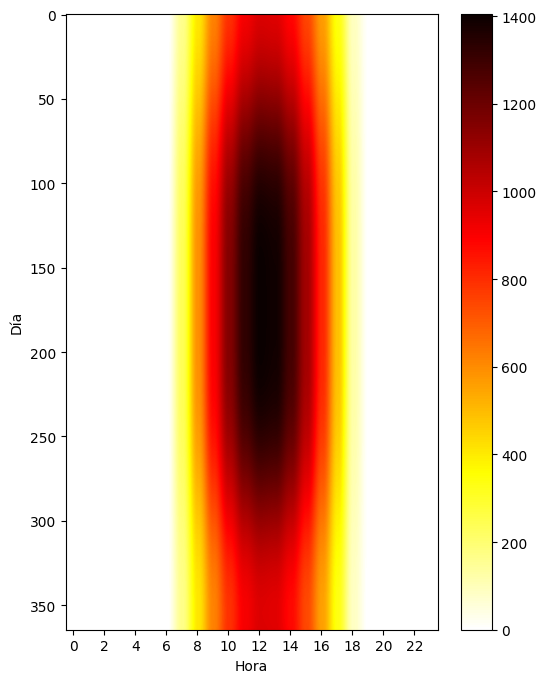

In [41]:

import math as mt


def radiacion_solar_S0(dia_anho):
    dia_ref = 81  # 22 de marzo
    if dia_anho < 81:
        D = 365 - dia_ref + dia_anho
    else:
        D = dia_anho - dia_ref
    constante_solar = 1367.
    distancia_media_sol = 149597870000.  # metros

    d = (1.496 * 10 ** 11) * (1 - 0.017 * mt.sin(mt.radians(0.9856 * D)))
    return constante_solar * ((distancia_media_sol / d) ** 2)


def declinacion_solar(dia_anho):
    return 23.5 * mt.cos(mt.radians((360 * (dia_anho - 172) / 365.)))


def hora_solar(dia_anho, hora, longitud, longitud_del_uso, adelanto_hora_verano=0):
    M = dia_anho * 2. * mt.pi / 365.24
    EoT = 229.19 * (-0.0334 * mt.sin(mt.radians(M)) + 0.04184 * mt.sin(mt.radians(2 * M + 3.5884)))
    return 15 * (hora - adelanto_hora_verano - 12) + (longitud - longitud_del_uso) + EoT / 4.0


def radiacion_solar_teorica(dia, hora, latitud, longitud, longitud_uso_horario, hora_verano=0):
    S0 = radiacion_solar_S0(dia)
    inc = declinacion_solar(dia)
    w = hora_solar(dia, hora, longitud, longitud_uso_horario, hora_verano)
    S = S0 * mt.sin(mt.radians(90 - latitud + inc)) * mt.cos(mt.radians(w))
    return S if S>=0 else 0


def simulacion_radiacion_teorica_anual():
    radiacion = np.zeros((365, 24))
    for i, dia in enumerate(np.arange(0, 365)):
        for j, hora in enumerate(np.arange(0, 24)):
            s = radiacion_solar_teorica(dia, hora, latitud, longitud, longitud_uso)
            if s < 0:
                s = 0
            radiacion[i][j] = s
    fig = plt.figure(figsize=(6, 8))
    plt.imshow(radiacion, aspect='auto', cmap='hot_r')
    plt.xticks(np.arange(0, 24, 2), np.arange(0, 24, 2))
    plt.xlabel('Hora')
    plt.ylabel(u'Día')
    plt.colorbar()
    #plt.savefig('images/radiacion_teorica.png', bbox_inches='tight', dpi=150)
    plt.show()
simulacion_radiacion_teorica_anual()

In [30]:


df["Data"] = df["Data"].str.replace("12:00:00 AM", "")
df["Data"]= df["Data"]  + df["Time"]
df["Data"] = pd.to_datetime(df["Data"], format="%m/%d/%Y %H:%M:%S")


In [58]:
df["Radiacion_Teorica"]=df.apply(lambda row : radiacion_solar_teorica(row['Data'].dayofyear,
                     row["Data"].hour + row["Data"].minute/60., latitud, longitud, longitud_uso), axis = 1)

In [59]:
print(df["Radiacion_Teorica"].describe())
df["Radiation"].describe()




count    32686.000000
mean       352.035063
std        432.350969
min          0.000000
25%          0.000000
50%          0.000000
75%        768.614404
max       1349.804620
Name: Radiacion_Teorica, dtype: float64


count    32686.000000
mean       207.124697
std        315.916387
min          1.110000
25%          1.230000
50%          2.660000
75%        354.235000
max       1601.260000
Name: Radiation, dtype: float64

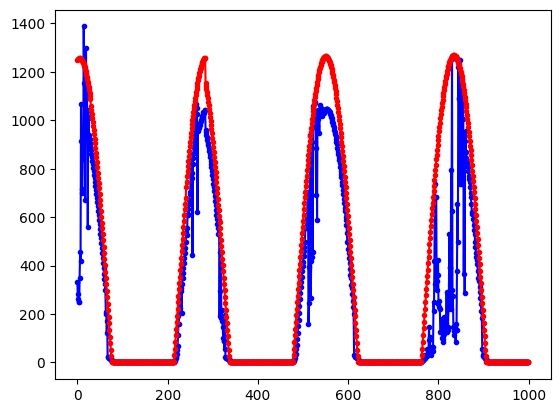

In [64]:
plt.plot(np.arange(len(df["Radiacion_Teorica"][700:1700])), df["Radiation"][700:1700], '.-b')
plt.plot(np.arange(len(df["Radiacion_Teorica"][700:1700])), df["Radiacion_Teorica"][700:1700], '.-r')
plt.show()